In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

In [3]:
mnist = pd.read_csv('datasets/mnist.csv')
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
mnist.shape

(42000, 785)

In [5]:
sorted(mnist['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
mnist_fe = mnist[mnist.columns[1:]]
mnist_labels = mnist['label']

In [7]:
def display_img(index):
    print('digit: ', mnist_labels[index])
    plt.imshow(mnist_fe.loc[index].values.reshape(28,28),
               cmap= 'Greys')

digit:  1


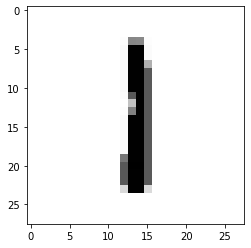

In [8]:
display_img(2)

digit:  3


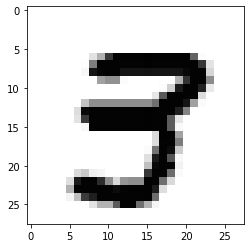

In [9]:
display_img(2000)

In [10]:
mnist_fe = np.array(mnist_fe)
mnist_fe.shape

(42000, 784)

In [11]:
mnist_fe[10][150:200]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   7,  24,  24,  97, 253, 253, 253, 253, 255,
       180,  48,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [13]:
mnist_fe = mnist_fe/255
mnist_fe[10][150:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00010765, 0.00036909, 0.00036909, 0.00149173, 0.00389081,
       0.00389081, 0.00389081, 0.00389081, 0.00392157, 0.00276817,
       0.00073818, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [14]:
x_train, x_test, y_train, y_test = train_test_split(mnist_fe,
                                                    mnist_labels,
                                                    shuffle= True,
                                                    test_size= 0.2)

In [15]:
logistic = linear_model.LogisticRegression(solver= 'lbfgs',
                                           max_iter = 1000,
                                           multi_class = 'multinomial')
#multinomial loss function

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [0.1, 1, 5]}]

grid_search = GridSearchCV(logistic, param_grid, cv= 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 5}

In [17]:
for i in range(3):
    print('parameter: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])

parameter:  {'C': 0.1}
mean test score:  0.13485119047619049
rank:  3
parameter:  {'C': 1}
mean test score:  0.6574702380952381
rank:  2
parameter:  {'C': 5}
mean test score:  0.7866369047619047
rank:  1


In [18]:
rbm = BernoulliRBM(verbose= True)
rbm_fe_classifier = Pipeline(steps= [('rbm', rbm),
                                     ('logistic', logistic)])
rbm.learning_rate= 0.06
logistic.C = grid_search.best_params_['C']

In [19]:
rbm_fe_classifier.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'rbm', 'logistic', 'rbm__batch_size', 'rbm__learning_rate', 'rbm__n_components', 'rbm__n_iter', 'rbm__random_state', 'rbm__verbose', 'logistic__C', 'logistic__class_weight', 'logistic__dual', 'logistic__fit_intercept', 'logistic__intercept_scaling', 'logistic__l1_ratio', 'logistic__max_iter', 'logistic__multi_class', 'logistic__n_jobs', 'logistic__penalty', 'logistic__random_state', 'logistic__solver', 'logistic__tol', 'logistic__verbose', 'logistic__warm_start'])

In [21]:
param_grid = [{'rbm__n_components' : [5, 50, 100, 150],
               'rbm__n_iter' : [5, 20]}]

grid_search = GridSearchCV(rbm_fe_classifier, param_grid, cv= 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_

[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.66, time = 1.28s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.94, time = 1.52s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.73, time = 1.25s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.63, time = 1.26s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -0.59, time = 1.28s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.67, time = 1.15s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.94, time = 1.35s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.72, time = 1.27s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.62, time = 1.31s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -0.58, time = 1.34s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -1.67, time = 1.18s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.94, time = 1.29s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.73, time = 1.26s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.64, time = 1.31s
[BernoulliRBM] Iteration 5, pseudo-likelihood = 

[BernoulliRBM] Iteration 11, pseudo-likelihood = -0.41, time = 1.89s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -0.43, time = 1.97s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -0.42, time = 1.82s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -0.39, time = 2.04s
[BernoulliRBM] Iteration 15, pseudo-likelihood = -0.44, time = 1.74s
[BernoulliRBM] Iteration 16, pseudo-likelihood = -0.41, time = 1.72s
[BernoulliRBM] Iteration 17, pseudo-likelihood = -0.41, time = 1.74s
[BernoulliRBM] Iteration 18, pseudo-likelihood = -0.39, time = 1.73s
[BernoulliRBM] Iteration 19, pseudo-likelihood = -0.42, time = 1.72s
[BernoulliRBM] Iteration 20, pseudo-likelihood = -0.41, time = 1.73s
[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.44, time = 1.59s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.44, time = 1.85s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.41, time = 1.82s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.41, time = 1.89s
[BernoulliRBM] Iteration 5, pseudo-lik

{'rbm__n_components': 5, 'rbm__n_iter': 5}

In [22]:
for i in range(8):
    print('parameter: ', grid_search.cv_results_['params'][i])
    print('mean test score: ', grid_search.cv_results_['mean_test_score'][i])
    print('rank: ', grid_search.cv_results_['rank_test_score'][i])

parameter:  {'rbm__n_components': 5, 'rbm__n_iter': 5}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 5, 'rbm__n_iter': 20}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 50, 'rbm__n_iter': 5}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 50, 'rbm__n_iter': 20}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 100, 'rbm__n_iter': 5}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 100, 'rbm__n_iter': 20}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 150, 'rbm__n_iter': 5}
mean test score:  0.11136904761904762
rank:  1
parameter:  {'rbm__n_components': 150, 'rbm__n_iter': 20}
mean test score:  0.11136904761904762
rank:  1
